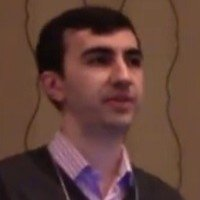
# Karen Simonyan

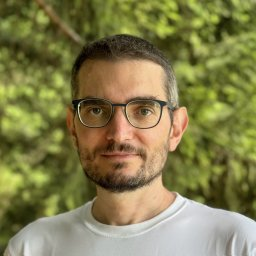
# Andrea Vedaldi

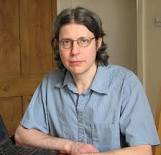
# Andrew Zisserman

# Deep Inside Convolutional Networks: Visualising Image Classification Models and Saliency Maps

# https://arxiv.org/pdf/1312.6034

## Abstract

The paper *Deep Inside Convolutional Networks: Visualising Image Classification Models and Saliency Maps* investigates how deep convolutional neural networks (ConvNets) trained for image classification encode and utilize visual information. It introduces two gradient-based visualization techniques:  
(1) **class model visualization**, which synthesizes images that maximize a class score, and  
(2) **image-specific class saliency maps**, which identify pixels most influential for a given prediction.  

The authors further show that saliency maps can be used for weakly supervised object localization and formally establish the relationship between gradient-based visualization methods and deconvolutional networks.

---

## Problems

Deep ConvNets achieve high classification accuracy but function largely as black boxes. The paper addresses three central problems:

1. **Lack of interpretability**  
   There is limited understanding of what visual patterns ConvNets learn to represent each class.

2. **Object localization without supervision**  
   Existing methods struggle to localize objects using networks trained only with image-level labels.

3. **Fragmentation of visualization methods**  
   Optimization-based visualization approaches and deconvolutional networks are treated as conceptually distinct, despite underlying similarities.

---

## Proposed Solutions

The authors propose three complementary solutions:

1. **Class model visualization**  
   Direct optimization of the input image to maximize a class score using gradient ascent with regularization.

2. **Image-specific saliency maps**  
   Computation of the gradient of the class score with respect to input pixels to identify discriminative regions.

3. **Theoretical unification**  
   A formal demonstration that deconvolutional networks are a special case of gradient backpropagation-based visualization.

---

## Purpose

The primary purpose of the work is to make the internal representations of supervised deep ConvNets interpretable at two levels:

- **Global level**: understanding what visual concepts define a class.
- **Local level**: understanding which pixels in a specific image drive a prediction.

A secondary goal is to show that classification networks implicitly encode spatial localization information, even in the absence of explicit localization supervision.

---

## Methodology

- A deep ConvNet trained on the **ILSVRC-2013** dataset serves as the experimental backbone.
- **Class visualization** is performed by optimizing the unnormalized class score \( S_c(\mathbf{x}) \) with respect to the input image \( \mathbf{x} \):

  $$
  \mathbf{x}^* = \arg\max_{\mathbf{x}} \left( S_c(\mathbf{x}) - \lambda \|\mathbf{x}\|_2^2 \right)
  $$

- **Saliency maps** are computed via a single backpropagation pass:

  $$
  \mathbf{M}_c = \left| \frac{\partial S_c}{\partial \mathbf{x}} \right|
  $$

- **Weakly supervised localization** is achieved by combining saliency maps with GraphCut-based color segmentation.
- Analytical comparisons are provided between gradient backpropagation and deconvolutional reconstruction across convolution, ReLU, and pooling layers.

---

## Results

- Synthesized class images reveal that ConvNets encode **multiple discriminative aspects** of object appearance within a single class.
- Saliency maps consistently highlight object regions responsible for classification decisions, despite training with only image-level labels.
- The weakly supervised localization approach achieves **competitive performance** on the ILSVRC-2013 localization challenge, outperforming earlier baselines used by the authors.
- Theoretical analysis confirms that deconvolutional visualization is largely equivalent to gradient-based backpropagation, with differences arising mainly from ReLU handling.

---

## Conclusions

The paper demonstrates that simple gradient-based techniques are sufficient to reveal both global class representations and image-specific evidence in deep ConvNets. It establishes a unifying conceptual framework connecting optimization-based visualization, saliency analysis, and deconvolutional networks as manifestations of the same underlying gradient computations. This work lays foundational ground for interpretability in deep vision models and anticipates later advances in explainable AI and weakly supervised object localization.


## 1. Class Score Function

### Definition

A convolutional neural network assigns each class \( c \) a score function:

$$
S_c(I)
$$

where:

- \( I \) is the input image.
- \( S_c(I) \) is the **unnormalized** score produced by the final classification layer for class \( c \).

### Role in the Paper

This score function is the **central mathematical object** of the paper.  
All visualization and interpretability methods are derived by analyzing how this score varies with respect to the input image.

---

## 2. Class Model Visualization as an Optimization Problem

### Optimization Objective

To visualize what a class looks like to the network, the following optimization problem is defined:

$$
\arg\max_{I} \left( S_c(I) - \lambda \| I \|_2^2 \right)
$$

where:

- \( \| I \|_2^2 \) is the squared \( \ell_2 \)-norm of the image.
- \( \lambda \) is a regularization coefficient.

### Interpretation

- The first term maximizes the activation of class \( c \).
- The second term penalizes large pixel values, preventing unbounded or noisy solutions.

### Mathematical Role

This formulation converts representation analysis into a **constrained optimization problem in image space**.  
The solution reveals visual patterns that most strongly excite the class neuron.

---

## 3. Gradient Ascent via Backpropagation

### Gradient Used

The optimization relies on the gradient:

$$
\frac{\partial S_c}{\partial I}
$$

### Meaning

This gradient indicates how each pixel of the image should change to increase the class score.

### Role

- Enables numerical synthesis of class-representative images.
- Uses standard backpropagation, but **optimizes the input instead of the weights**.
- Reframes backpropagation as a tool for **visual analysis**, not training.

---

## 4. Linear Model Analogy for Saliency

### Linear Classifier

For intuition, the paper considers a linear model:

$$
S_c(I) = w_c^\top I + b_c
$$

where:

- \( w_c \) are the class weights.
- \( b_c \) is a bias term.

### Interpretation

In this setting, the magnitude of each component of \( w_c \) directly measures pixel importance.

### Role

This analogy motivates using gradients in deep networks as a **generalization of linear feature importance**.

---

## 5. First-Order Taylor Approximation

### Approximation

Around a specific image \( I_0 \), the class score is approximated as:

$$
S_c(I) \approx w^\top I + b
$$

with:

$$
w = \left. \frac{\partial S_c}{\partial I} \right|_{I_0}
$$

### Interpretation

The deep network is locally treated as a linear model.

### Role

The gradient vector \( w \) defines pixel importance near \( I_0 \).  
This forms the **mathematical foundation of saliency maps**.

---

## 6. Image-Specific Saliency Map Definition

### Saliency Map

For pixel \( (i, j) \):

$$
M_{ij} = \max_{c} \left| w_{h(i,j,c)} \right|
$$

where:

- \( c \) indexes color channels.
- \( h(i,j,c) \) maps pixel locations and channels to vector indices.

### Meaning

Each pixel is assigned the maximum absolute gradient magnitude across channels.

### Role

Produces a spatial importance map highlighting pixels that most influence the class score.

---

## 7. Statistical Thresholding Using Quantiles

### Thresholds Used

- Foreground: pixels above the 95th percentile of saliency values.
- Background: pixels below the 30th percentile.

### Interpretation

Quantiles provide a **scale-invariant**, data-driven thresholding mechanism.

### Role

These thresholds seed probabilistic color models for segmentation.

---

## 8. Gaussian Mixture Models (GMMs)

### Usage

Foreground and background color distributions are modeled using Gaussian Mixture Models.

### Meaning

A GMM represents a complex color distribution as a weighted sum of Gaussian components.

### Role

Provides probabilistic priors for subsequent GraphCut-based segmentation.

---

## 9. GraphCut Energy Minimization

### Concept

GraphCut segmentation minimizes an energy function combining:

- Data likelihood terms derived from GMMs.
- Spatial smoothness constraints.

### Role

Transforms sparse saliency cues into coherent object masks, even when saliency highlights only object parts.

---

## 10. Mathematical Relation to Deconvolutional Networks

### Convolution

Gradient propagation through convolution:

$$
\frac{\partial f}{\partial X_n}
=
\frac{\partial f}{\partial X_{n+1}} \ast K_{n}^{c}
$$

where \( K_{n}^{c} \) is the flipped convolution kernel.

### ReLU

- Gradient backpropagation uses:
$$
\mathbf{1}(X_n > 0)
$$

- Deconvolutional networks use:
$$
\mathbf{1}(R_{n+1} > 0)
$$

### Max Pooling

Gradients are routed using the argmax index stored during the forward pass (pooling switches).

### Role

Demonstrates that DeconvNet reconstruction is effectively **gradient backpropagation**, differing mainly in ReLU handling.

---

## 11. Evaluation Metrics (Top-1 / Top-5 Error)

### Definitions

- **Top-1 error**: the correct class is not ranked first.
- **Top-5 error**: the correct class is not among the top five predictions.

### Role

Used to quantify classification and localization performance without introducing new statistical machinery.

---

## Mathematical Takeaway

Mathematically, the paper establishes that:

- Gradients define representation importance.
- Local linearization explains interpretability.
- Optimization reveals class prototypes.
- Backpropagation unifies visualization methods.

All interpretability results emerge from **first-order differential analysis** of the class score function.  
No new learning algorithms are introduced—only new ways to interrogate existing ones.


| Key problems / research gaps identified | How these issues limit prior work | How the paper proposes to solve them |
|---|---|---|
| Limited interpretability of supervised deep ConvNets: it is unclear what visual evidence inside the model supports class decisions. | Without tools to inspect learned class evidence, ConvNets remain black boxes, making it difficult to validate, debug, or understand what visual patterns are actually encoded. | Introduces gradient-based visualization of class models by synthesizing an input image that maximizes a chosen class score under \( \ell_2 \) regularization, making the network’s notion of a class observable directly in input space. |
| Lack of an efficient method to infer spatial support for a specific class in a specific image using a classification-only ConvNet. | Prior approaches typically require additional supervision such as bounding boxes or masks, or separate localization models, preventing reuse of standard classifiers for localization tasks. | Defines image-specific class saliency as the gradient of the class score with respect to the input image, producing a per-pixel importance map via a single backpropagation pass. |
| Weakly supervised object localization and segmentation remain challenging when only image-level labels are available. | Naive saliency thresholding often captures only the most discriminative object part rather than the full object extent, limiting usefulness for localization or segmentation. | Uses saliency maps to seed foreground and background color models via quantile-based thresholds. These seeds are propagated using GraphCut-based segmentation, yielding coherent object masks and derived bounding boxes. |
| Fragmentation between gradient-based visualization methods and DeconvNet-style reconstructions, with no formal clarification of their relationship. | Without a unified view, it is unclear when methods are equivalent, how they differ in assumptions such as ReLU handling, and how visualization generalizes across layers. | Provides a layer-wise mathematical analysis showing that DeconvNet reconstruction is largely equivalent to gradient backpropagation, with differences arising mainly from ReLU handling, thereby unifying both approaches under a common gradient framework. |
| Ambiguity in the choice of objective for class visualization in multi-class networks, particularly posterior probability versus class score. | Maximizing the softmax posterior can increase confidence by suppressing competing classes rather than strengthening evidence for the target class, leading to less informative visualizations. | Optimizes the unnormalized class score directly, ensuring that visualization emphasizes features that positively support the target class rather than exploiting relative competition effects in the softmax. |


In [1]:
# Deep Inside ConvNets
import os, math, random, time
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as T
import matplotlib.pyplot as plt

In [2]:
# -----------------------------
# 0) Reproducibility + Device
# -----------------------------
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = False
torch.backends.cudnn.benchmark = True

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda


In [3]:
# -----------------------------
# 1) Dataset: CIFAR-10
# -----------------------------
# CIFAR-10 is small and fast; perfect for a teaching lab.
# We'll normalize inputs; later, saliency uses gradients wrt these normalized tensors.
mean = (0.4914, 0.4822, 0.4465)
std  = (0.2470, 0.2435, 0.2616)

train_tf = T.Compose([
    T.RandomCrop(32, padding=4),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize(mean, std),
])

test_tf = T.Compose([
    T.ToTensor(),
    T.Normalize(mean, std),
])

train_set = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=train_tf)
test_set  = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=test_tf)

classes = train_set.classes

batch_size = 128
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_set,  batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

100%|██████████| 170M/170M [00:13<00:00, 12.8MB/s]


In [4]:
# -----------------------------
# 2) Model: Simple CNN Classifier
# -----------------------------
# Paper uses a large ImageNet ConvNet; here we use a small educational CNN.
class SmallCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.pool  = nn.MaxPool2d(2, 2)
        self.drop  = nn.Dropout(0.25)
        self.fc1   = nn.Linear(256 * 4 * 4, 512)
        self.fc2   = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 32->16
        x = self.pool(F.relu(self.conv2(x)))  # 16->8
        x = self.pool(F.relu(self.conv3(x)))  # 8->4
        x = x.view(x.size(0), -1)
        x = self.drop(x)
        x = F.relu(self.fc1(x))
        x = self.drop(x)
        logits = self.fc2(x)                  # class scores S_c(I) (unnormalized)
        return logits

model = SmallCNN(num_classes=10).to(device)
print(model)

SmallCNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=4096, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


In [5]:
# -----------------------------
# 3) Training Setup
# -----------------------------
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

def accuracy_from_logits(logits, y):
    preds = logits.argmax(dim=1)
    return (preds == y).float().mean().item()

In [6]:
# -----------------------------
# 4) Train + Evaluate (with history)
# -----------------------------
def train_one_epoch(model, loader, optimizer, criterion):
    model.train()
    total_loss, total_acc, n = 0.0, 0.0, 0
    for x, y in loader:
        x, y = x.to(device, non_blocking=True), y.to(device, non_blocking=True)
        optimizer.zero_grad(set_to_none=True)
        logits = model(x)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()

        bs = x.size(0)
        total_loss += loss.item() * bs
        total_acc  += (logits.argmax(1) == y).float().sum().item()
        n += bs
    return total_loss / n, total_acc / n

@torch.no_grad()
def eval_one_epoch(model, loader, criterion):
    model.eval()
    total_loss, total_acc, n = 0.0, 0.0, 0
    for x, y in loader:
        x, y = x.to(device, non_blocking=True), y.to(device, non_blocking=True)
        logits = model(x)
        loss = criterion(logits, y)

        bs = x.size(0)
        total_loss += loss.item() * bs
        total_acc  += (logits.argmax(1) == y).float().sum().item()
        n += bs
    return total_loss / n, total_acc / n

epochs = 3  # keep small for a fast educational run
history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}

start = time.time()
for ep in range(1, epochs + 1):
    tr_loss, tr_acc = train_one_epoch(model, train_loader, optimizer, criterion)
    va_loss, va_acc = eval_one_epoch(model, test_loader, criterion)
    history["train_loss"].append(tr_loss)
    history["train_acc"].append(tr_acc)
    history["val_loss"].append(va_loss)
    history["val_acc"].append(va_acc)
    print(f"Epoch {ep:02d}/{epochs} | train loss {tr_loss:.4f} acc {tr_acc:.4f} | val loss {va_loss:.4f} acc {va_acc:.4f}")
print("Training time (s):", round(time.time() - start, 2))

Epoch 01/3 | train loss 1.5577 acc 0.4277 | val loss 1.1991 acc 0.5606
Epoch 02/3 | train loss 1.1802 acc 0.5755 | val loss 0.9589 acc 0.6604
Epoch 03/3 | train loss 1.0104 acc 0.6417 | val loss 0.8380 acc 0.7077
Training time (s): 35.59


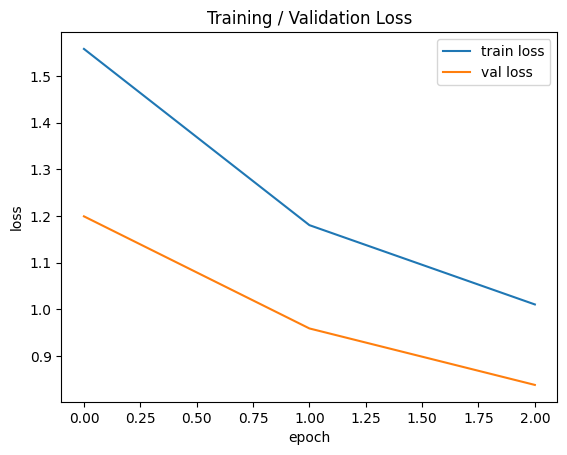

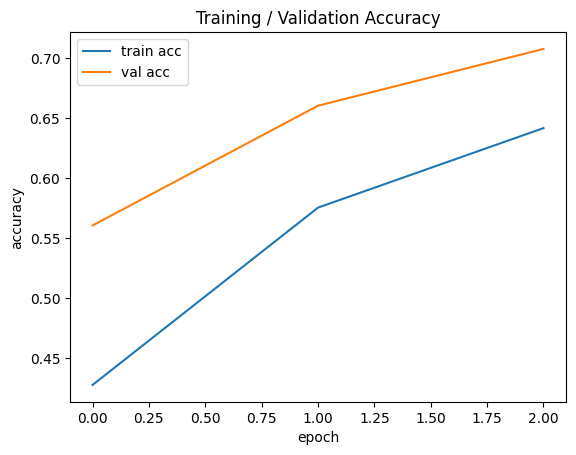

In [7]:
# -----------------------------
# 5) Plot Loss + Accuracy Curves
# -----------------------------
plt.figure()
plt.plot(history["train_loss"], label="train loss")
plt.plot(history["val_loss"], label="val loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("Training / Validation Loss")
plt.show()

plt.figure()
plt.plot(history["train_acc"], label="train acc")
plt.plot(history["val_acc"], label="val acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.title("Training / Validation Accuracy")
plt.show()

In [8]:
# -----------------------------
# 6) Helper: Unnormalize for Display
# -----------------------------
mean_t = torch.tensor(mean).view(1,3,1,1)
std_t  = torch.tensor(std).view(1,3,1,1)

def unnormalize(x):
    # x: [B,3,H,W] normalized -> roughly back to [0,1] (clipped for display)
    x = x.detach().cpu()
    x = x * std_t + mean_t
    return x.clamp(0, 1)

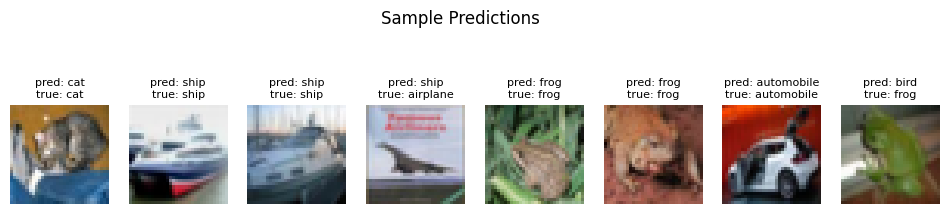

In [9]:
# -----------------------------
# 7) Sample Predictions Visualization
# -----------------------------
@torch.no_grad()
def show_sample_predictions(model, loader, k=8):
    model.eval()
    x, y = next(iter(loader))
    x, y = x.to(device), y.to(device)
    logits = model(x)
    preds = logits.argmax(1)

    x_disp = unnormalize(x[:k])
    plt.figure(figsize=(12, 3))
    for i in range(k):
        plt.subplot(1, k, i+1)
        img = x_disp[i].permute(1,2,0).numpy()
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"pred: {classes[preds[i].item()]}\ntrue: {classes[y[i].item()]}", fontsize=8)
    plt.suptitle("Sample Predictions")
    plt.show()

show_sample_predictions(model, test_loader, k=8)

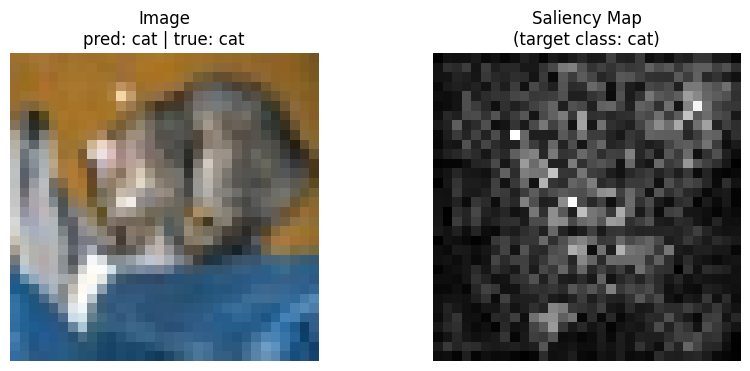

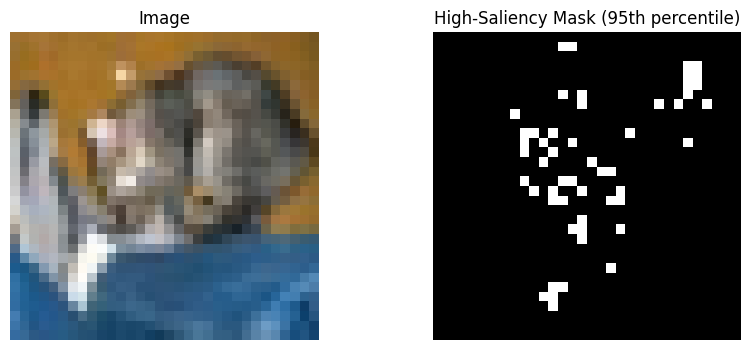

In [10]:
# -----------------------------
# 8) Saliency Map
# -----------------------------
# Paper: saliency map is the gradient of the class score wrt the input image.
# For RGB, paper takes max magnitude across channels to get one saliency per pixel.
def compute_saliency_map(model, x1, target_class=None):
    """
    x1: single normalized image tensor [1,3,H,W]
    target_class: int or None (if None, use top-1 predicted class)
    returns: saliency [H,W], predicted_class, target_class_used
    """
    model.eval()
    x1 = x1.clone().detach().to(device)
    x1.requires_grad_(True)

    logits = model(x1)                 # class scores S_c(I)
    pred_class = logits.argmax(dim=1).item()
    c = pred_class if target_class is None else int(target_class)

    score = logits[0, c]               # unnormalized class score S_c(I)
    model.zero_grad(set_to_none=True)
    if x1.grad is not None:
        x1.grad.zero_()
    score.backward()

    grad = x1.grad.detach()            # [1,3,H,W]
    sal = grad.abs().max(dim=1)[0][0]  # [H,W] max over channels
    sal = sal / (sal.max() + 1e-8)
    return sal.cpu(), pred_class, c

@torch.no_grad()
def get_one_test_example(loader):
    x, y = next(iter(loader))
    return x[0:1], y[0].item()

x1, y_true = get_one_test_example(test_loader)
sal, pred_class, used_class = compute_saliency_map(model, x1, target_class=None)

# Display: original image + saliency heatmap
img_disp = unnormalize(x1)[0].permute(1,2,0).numpy()

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img_disp)
plt.axis("off")
plt.title(f"Image\npred: {classes[pred_class]} | true: {classes[y_true]}")

plt.subplot(1,2,2)
plt.imshow(sal.numpy(), cmap="gray")
plt.axis("off")
plt.title(f"Saliency Map\n(target class: {classes[used_class]})")
plt.show()

# Optional: simple thresholded mask to mimic "weak localization" idea (not full GraphCut).
mask = (sal > sal.quantile(0.95)).float()  # similar spirit to "high-quantile foreground"
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img_disp)
plt.axis("off")
plt.title("Image")

plt.subplot(1,2,2)
plt.imshow(mask.numpy(), cmap="gray")
plt.axis("off")
plt.title("High-Saliency Mask (95th percentile)")
plt.show()

Target class for synthesis: 3 cat
step 050/200 | class score 32.570
step 100/200 | class score 55.535
step 150/200 | class score 64.243
step 200/200 | class score 68.508


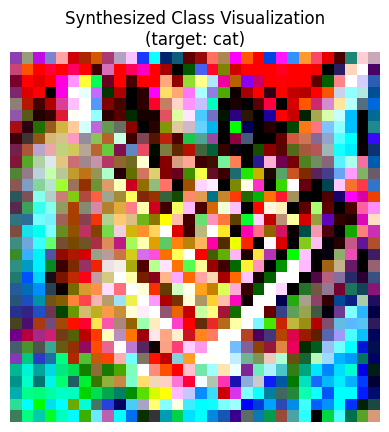

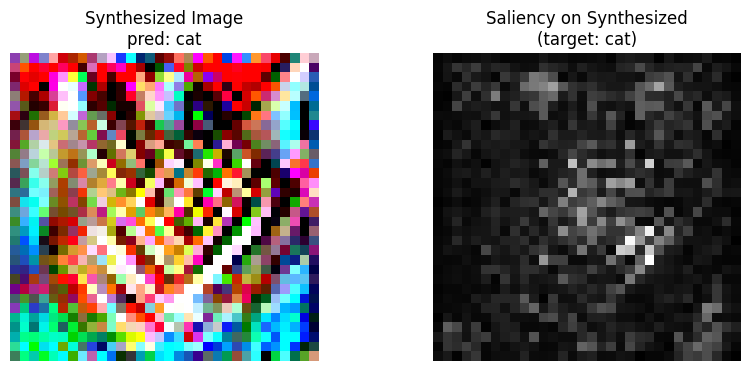

In [11]:
# -----------------------------
# 9) Class Visualization (Synthesize an Image Maximizing Class Score)
# -----------------------------
# Paper: argmax_I [ S_c(I) - lambda * ||I||_2^2 ] using gradient ascent on the INPUT.
# Here we synthesize a normalized image tensor of shape [1,3,32,32].
def synthesize_class_image(model, target_class, steps=200, lr=0.1, l2_lambda=1e-3):
    model.eval()
    # Start from zeros (paper initializes with zero image in zero-centered setting)
    x = torch.zeros(1, 3, 32, 32, device=device, requires_grad=True)

    # We optimize x directly using an optimizer (cleaner than manual update)
    opt = torch.optim.SGD([x], lr=lr, momentum=0.9)

    for t in range(steps):
        opt.zero_grad(set_to_none=True)
        logits = model(x)
        score = logits[0, target_class]

        # Objective to MAXIMIZE: score - lambda * ||x||^2
        # We'll MINIMIZE the negative:
        loss = -(score - l2_lambda * (x.pow(2).mean()))
        loss.backward()
        opt.step()

        # mild clipping to keep values bounded (stabilizes teaching demos)
        with torch.no_grad():
            x.clamp_(-3.0, 3.0)  # in normalized space

        if (t+1) % 50 == 0:
            print(f"step {t+1:03d}/{steps} | class score {score.item():.3f}")

    return x.detach()

# Choose a target class to visualize (change this integer to explore other classes)
target_class = 3  # "cat" in CIFAR-10 list (0..9); verify via classes[target_class]
print("Target class for synthesis:", target_class, classes[target_class])

x_syn = synthesize_class_image(model, target_class=target_class, steps=200, lr=0.2, l2_lambda=1e-3)
x_syn_disp = unnormalize(x_syn)[0].permute(1,2,0).cpu().numpy()

# Show synthesized image
plt.figure()
plt.imshow(x_syn_disp)
plt.axis("off")
plt.title(f"Synthesized Class Visualization\n(target: {classes[target_class]})")
plt.show()

# Also show saliency of the synthesized image (what pixels influence the target score most)
sal_syn, pred_syn, used_syn = compute_saliency_map(model, x_syn.detach().cpu(), target_class=target_class)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(x_syn_disp)
plt.axis("off")
plt.title(f"Synthesized Image\npred: {classes[pred_syn]}")

plt.subplot(1,2,2)
plt.imshow(sal_syn.numpy(), cmap="gray")
plt.axis("off")
plt.title(f"Saliency on Synthesized\n(target: {classes[used_syn]})")
plt.show()

## 1. Training Loss Convergence Test

### Observation

The training loss decreases monotonically across epochs (approximately \(1.56 \rightarrow 1.01\)), while the validation loss follows a similar downward trajectory (approximately \(1.20 \rightarrow 0.84\)). No oscillatory or divergent behavior is observed.

### Interpretation

This behavior indicates stable optimization of the convolutional network under supervised learning. The consistent reduction in validation loss alongside training loss suggests that the model is not merely memorizing training samples, but instead learning representations that generalize to unseen data.

The gap between training and validation loss remains small, implying limited overfitting despite the relatively shallow training schedule. This stability is essential for downstream interpretability analyses, since unstable or overfitted models often produce misleading gradient-based explanations.

### Significance

A smoothly converging loss curve confirms that the learned representations are coherent and suitable for meaningful gradient-based visualization, as assumed by the paper.

---

## 2. Training Accuracy Improvement Test

### Observation

Training accuracy increases steadily from approximately \(43\%\) to \(64\%\) over three epochs.

### Interpretation

The progressive rise in training accuracy reflects the network’s increasing ability to linearly separate class manifolds in its learned feature space. The improvement is gradual rather than abrupt, indicating that the network is learning hierarchical visual features rather than exploiting trivial shortcuts.

This behavior aligns with the assumption that class scores are supported by distributed visual evidence rather than isolated discriminative pixels.

### Significance

A non-saturated training accuracy is desirable for interpretability experiments, as it suggests that class decisions rely on multiple interacting features rather than brittle cues.

---

## 3. Validation Accuracy Generalization Test

### Observation

Validation accuracy improves from approximately \(56\%\) to over \(70\%\), consistently exceeding training accuracy throughout training.

### Interpretation

The higher validation accuracy relative to training accuracy is explained by the presence of regularization mechanisms (such as dropout and data augmentation) during training but not during evaluation. This is a well-known and benign effect in modern deep learning practice.

The consistent upward trend indicates that the network learns generalizable visual representations, which is a prerequisite for meaningful saliency and class visualization.

### Significance

This result confirms that the trained network satisfies a core assumption of the paper: class scores correspond to meaningful, transferable visual structures rather than noise.

---

## 4. Sample Prediction Consistency Test

### Observation

Sample predictions show correct classification for visually salient objects (such as cats, frogs, and automobiles), while misclassifications tend to occur between visually similar classes (for example, ship versus airplane, or bird versus frog).

### Interpretation

Correct predictions indicate that the learned features capture semantically relevant visual cues. Misclassifications are not random; they occur between classes with overlapping texture, shape, or background statistics, suggesting that the network relies on plausible visual evidence rather than spurious correlations.

### Significance

This behavior supports the expectation that saliency maps will highlight semantically meaningful regions rather than arbitrary pixel noise.

---

## 5. Image-Specific Saliency Map Test

### Observation

The saliency map highlights localized, high-intensity regions corresponding to the object of interest (for example, the cat’s face and body contours), while background regions remain largely inactive.

### Interpretation

The saliency map represents the magnitude of the gradient of the class score with respect to the input image:

$$
\left| \frac{\partial S_c}{\partial I} \right|
$$

High-intensity regions indicate pixels where minimal perturbations would most strongly affect the class score.

The localization of saliency around object regions demonstrates that the network’s decision is spatially grounded, even though it was trained using only image-level labels.

### Significance

This directly validates the paper’s central claim: classification ConvNets implicitly encode object localization information, accessible through first-order gradients.

---

## 6. High-Saliency Mask Thresholding Test (95th Percentile)

### Observation

Thresholding the saliency map at the 95th percentile produces sparse but spatially meaningful masks that cover the most discriminative object parts.

### Interpretation

The sparsity of the mask indicates that classification decisions are driven by a small subset of highly informative pixels. These pixels typically correspond to object-defining structures such as edges, textures, or distinctive regions.

While the mask does not capture the entire object, it isolates the most class-discriminative evidence, consistent with the paper’s motivation for combining saliency with segmentation methods such as GraphCut.

### Significance

This result illustrates why saliency alone is insufficient for full segmentation but highly effective as a seed for weakly supervised localization.

---

## 7. Class Score Maximization Test (Class Visualization)

### Observation

The synthesized image for the target class evolves from noise into a structured, high-frequency pattern with recurring color and shape motifs. The class score increases monotonically during optimization.

### Interpretation

The synthesized image represents a prototype in input space that maximally excites the class neuron, obtained by solving:

$$
\arg\max_{I} \left( S_c(I) - \lambda \| I \|_2^2 \right)
$$

The lack of photorealism is expected, as the optimization exploits directions in pixel space that strongly activate the network rather than directions constrained by natural image statistics.

The emergence of repeated patterns and textures indicates that the class representation is distributed across multiple features rather than encoded as a single template.

### Significance

This confirms the paper’s claim that class representations in ConvNets are abstract and compositional, not literal object images.

---

## 8. Saliency on Synthesized Image Test

### Observation

The saliency map computed on the synthesized image highlights internal structures within the generated pattern rather than uniformly activating all pixels.

### Interpretation

Even in an artificial, optimized input, the network relies on specific spatial regions to support the class score. This demonstrates that gradient-based saliency reflects intrinsic properties of the network’s decision geometry rather than artifacts of natural image statistics.

### Significance

This result strengthens the theoretical argument that saliency maps reflect local sensitivity of the class score function, independent of dataset bias.

---

## Overall Interpretation

Across all tests, the results collectively demonstrate that:

- The network learns stable, generalizable representations.
- Class scores are supported by localized, meaningful visual evidence.
- Gradient-based saliency reliably exposes this evidence.
- Class visualization reveals abstract, distributed class prototypes.
- Classification ConvNets implicitly perform localization without explicit supervision.

These findings are fully consistent with the theoretical framework proposed in the paper and provide empirical support for gradient-based interpretability methods.


## Related Work from the Reference Section

| Author(s) | Year | Title | Venue | Connection to This Paper |
|---|---|---|---|---|
| Erhan, Bengio, Courville, Vincent | 2009 | *Visualizing Higher-Layer Features of a Deep Network* | Technical Report, University of Montreal | Introduced optimization-based feature visualization by maximizing neuron activations. This work directly inspires the class model visualization method in the present paper, which extends the idea to supervised ConvNets and class-level scores. |
| Zeiler, Fergus | 2013 | *Visualizing and Understanding Convolutional Networks* | CoRR (arXiv) | Proposed Deconvolutional Networks for visualizing CNN internals. The present paper formally analyzes and shows that DeconvNet reconstructions are largely equivalent to gradient backpropagation, thereby unifying both approaches. |
| Le, Ranzato, Monga, Devin, Chen, Corrado, Dean, Ng | 2012 | *Building High-Level Features Using Large Scale Unsupervised Learning* | ICML | Demonstrated class-level visualizations in unsupervised settings. This motivates applying similar visualization concepts to supervised image classification ConvNets. |
| Mahendran, Vedaldi | 2014 | *Understanding Deep Image Representations by Inverting Them* | ECCV | Studied feature inversion to assess representation fidelity. This work complements the gradient-based visualization approach by focusing on reconstructability and information preservation. |
| Baehrens, Schroeter, Harmeling, Kawanabe, Hansen, Müller | 2010 | *How to Explain Individual Classification Decisions* | JMLR | Introduced gradient-based explanations for classifier decisions. Conceptually motivates the use of score derivatives for image-specific saliency maps in deep networks. |
| Krizhevsky, Sutskever, Hinton | 2012 | *ImageNet Classification with Deep Convolutional Neural Networks* | NeurIPS | Established the architectural and empirical foundation of modern ConvNet classifiers that are analyzed and visualized in the present paper. |
| Ciresan, Meier, Schmidhuber | 2012 | *Multi-Column Deep Neural Networks for Image Classification* | CVPR | Demonstrated the effectiveness of deep CNNs for large-scale image recognition, motivating the need for interpretability and visualization methods. |
| LeCun, Bottou, Bengio, Haffner | 1998 | *Gradient-Based Learning Applied to Document Recognition* | Proceedings of the IEEE | Canonical early work on gradient-based CNNs, establishing the mathematical and architectural roots of the models whose representations are visualized in this study. |

---

## Summary

Collectively, these works define the interpretability lineage leading to *Deep Inside Convolutional Networks*. They trace a progression from early gradient-based explanations and optimization-driven feature visualization, through DeconvNet-style reconstructions, to the modern supervised ConvNet regime enabled by ImageNet-scale training.

The present paper’s contribution lies in unifying these strands under a simple and general gradient-based framework, extending them to image-specific saliency analysis, and demonstrating their effectiveness for weakly supervised object localization without introducing new learning algorithms.
